****

In [1]:
!pip install bert-extractive-summarizer

     |████████████████████████████████| 675kB 8.1MB/s 
     |████████████████████████████████| 890kB 10.5MB/s 
     |████████████████████████████████| 3.8MB 31.1MB/s 
     |████████████████████████████████| 1.1MB 38.6MB/s 
  Created wheel for bert-extractive-summarizer: filename=bert_extractive_summarizer-0.4.2-cp36-none-any.whl size=13711 sha256=98e1a37b1bcd2e54f8581a077a51ef68f5258201a79a7af7ddd91d9ced87202e
  Stored in directory: /root/.cache/pip/wheels/13/bc/30/654eb9e657177a56cba927c5a20b6cd01fb229b1ed2bf9b371
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=c0f81c789a3fc5ec8a3d40746c8d20a36cb796a5350eaf46c50f36bd3e425003
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built bert-extractive-summarizer sacremoses


In [0]:
import summarizer
import pickle
import torch

In [51]:
import numpy as np
import pandas as pd
#import DataFrame as df
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import networkx as nx
import torch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**The purpose of this function is to output a % associated to the length of the text which was reduced and summarized.**

In [0]:
def summary_perc(initial_text, summarized_text):
    percentage = len(summarized_text) / len(initial_text)
      
    return print('The initial text was reduced by : ', 1 - percentage,'where intial text length is :',len(initial_text),'and summarised text length is:',len(summarized_text))

In [0]:
from summarizer import Summarizer

**Implementation leveraging Bert Pretrained pytorch Model** 

---


Implementation
Step 1: Tokenize paragraph into sentences 

Step 2: Format each sentence as Bert input format, and Use Bert tokenizer to tokenize each sentence into words.

Step 3: Call Bert pretrained model, conduct word embedding, obtain embeded word vector for each sentence.(The Bert output is a 12-layer latent vector)

Step 4: Decide how to use the 12-layer latent vector:

1) Use only the last layer;

2) Average all or last 4 layers, and more...

Step 5: Apply pooling strategy to obtain sentence embedding from word embedding, eg. mean, max of all word vector

Step 6: Obtain sentence vector for each sentence in the paragraph, apply Kmeans, Gaussian Mixture, etc to cluster similar sentence

Step 7: Return the closest sentence to each centroid (euclidean distance) as the summary, ordered by appearance.

Paper: https://arxiv.org/abs/1906.04165

In [6]:
model = Summarizer()

In [0]:
text = []

**loading the input csv file**

In [0]:
reviews = pd.read_csv("/content/IMDB Dataset_org.csv")

In [10]:
reviews.shape

(50000, 3)

In [11]:
reviews.head(5)

,review,length of text,sentiment
0,Match 1: Tag Team Table Match Bubba Ray and Sp...,13704,positive
1,There's a sign on The Lost Highway that says:<...,12988,positive
2,"(Some spoilers included:)<br /><br />Although,...",12930,positive
3,"Back in the mid/late 80s, an OAV anime by titl...",12129,positive
4,**Attention Spoilers**<br /><br />First of all...,10363,positive


In [12]:
reviews.columns

Index(['review', 'length of text', 'sentiment'], dtype='object')

**Filtering out the reviews whose length is more than 2000**

In [0]:
df_filtered_reviews = reviews[reviews['length of text'] >= 2000] 

In [14]:
df_filtered_reviews.shape

(8421, 3)

**Moving all the filtered reviews to a list**

In [0]:
#sentences = []
for sentence in df_filtered_reviews['review']:
  text.append(sentence)

**Passing the input text as argument to the Summariser model**

In [0]:
n =len(text)

In [42]:
print(n)

8421


In [0]:
results = []
for i in range(n):
  input1 = str(text[i])
  #print(text[i])
  te = model(input1, min_length=60)
  results.append(te)

In [44]:
len(results)

8421

**storing the data as Dataframes**

In [0]:
import pandas as pd
df = pd.DataFrame(text)

In [0]:
df.columns = ['intial text']

In [61]:
df.columns

Index(['intial text', 'len of intial text'], dtype='object')

In [0]:
df['len of intial text'] = df['intial text'].apply(len)

In [0]:
df['summarised text'] = np.array(results)

In [0]:
df['len of summarised text'] = df['summarised text'].apply(len)

In [65]:
df.columns

Index(['intial text', 'len of intial text', 'summarised text',
       'len of summarised text'],
      dtype='object')

**Final outcome**

In [64]:
df.head(5)

,intial text,len of intial text,summarised text,len of summarised text
0,Match 1: Tag Team Table Match Bubba Ray and Sp...,13704,Match 1: Tag Team Table Match Bubba Ray and Sp...,2798
1,There's a sign on The Lost Highway that says:<...,12988,There's a sign on The Lost Highway that says:<...,2146
2,"(Some spoilers included:)<br /><br />Although,...",12930,"(Some spoilers included:)<br /><br />Although,...",2280
3,"Back in the mid/late 80s, an OAV anime by titl...",12129,"Back in the mid/late 80s, an OAV anime by titl...",2838
4,**Attention Spoilers**<br /><br />First of all...,10363,**Attention Spoilers**<br /><br />First of all...,2153


**Reducing the length of reviews in terms of %**

In [70]:
for i in range(20):
  summary_perc(initial_text = df['intial text'][i], summarized_text = df['summarised text'][i])

The initial text was reduced by :  0.7958260361938121 where intial text length is : 13704 and summarised text length is: 2798
The initial text was reduced by :  0.8347705574376347 where intial text length is : 12988 and summarised text length is: 2146
The initial text was reduced by :  0.8236658932714618 where intial text length is : 12930 and summarised text length is: 2280
The initial text was reduced by :  0.7660153351471679 where intial text length is : 12129 and summarised text length is: 2838
The initial text was reduced by :  0.7922416288719483 where intial text length is : 10363 and summarised text length is: 2153
The initial text was reduced by :  0.7833543261311888 where intial text length is : 10321 and summarised text length is: 2236
The initial text was reduced by :  0.9308612199778916 where intial text length is : 9951 and summarised text length is: 688
The initial text was reduced by :  0.813375796178344 where intial text length is : 9420 and summarised text length is: 1

**Storing the results to a csv file**

In [0]:
df.to_csv('output.csv', index=False)

**Plotting a scatter plot for first 10 values**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 

In [0]:
x =[]
y =[]
for i in range(10):
  x.append(df['len of intial text'][i])
  y.append(df['len of summarised text'][i])


In [0]:
df2=pd.DataFrame({'len of intial text': x, 'len of summarised text': y })

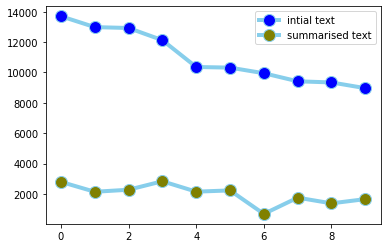

In [104]:
plt.plot(x,marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label="intial text")
plt.plot(y,marker='o', markerfacecolor='olive', markersize=12, color='skyblue', linewidth=4,label="summarised text")
plt.legend()


